In [1]:
import pandas as pd

In [76]:
import warnings

# Suppress SettingWithCopyWarning and PerformanceWarning
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)


df_weather = pd.read_csv("Данные по метеостанциям.csv")

df_weather['Местное время'] = pd.to_datetime(df_weather['Местное время'], format='%d.%m.%Y %H:%M')

df_weather['meteostation'] = df_weather['meteostation'].str.replace(" ", "")
df_weather['meteostation'] = df_weather['meteostation'].str.replace("БольшаяСоснова", "Большая Соснова")

df_weather.rename(columns={"E'": 'E_second'}, inplace=True)

columns = ['T', 'Po', 'P', 'Pa', 'U', 'DD', 'Ff', 'ff10', 'ff3',
       'N', 'WW', 'W1', 'W2', 'Tn', 'Tx', 'Cl', 'Nh', 'H', 'Cm', 'Ch', 'VV',
       'Td', 'RRR', 'tR', 'E', 'Tg', 'E_second']

df_weather_morning = df_weather[df_weather["Местное время"].dt.hour==8] # Восемь часов утра
df_weather_aftrenoon = df_weather[df_weather["Местное время"].dt.hour==20]

df_weather_morning_perm = df_weather_morning.loc[df_weather_morning["meteostation"] == "Пермь"]
df_weather_aftrenoon_perm = df_weather_aftrenoon.loc[df_weather_aftrenoon["meteostation"] == "Пермь"]
df_weather_morning_perm.sort_values(by='Местное время', inplace=True)
df_weather_aftrenoon_perm.sort_values(by='Местное время', inplace=True)

for i in [10]:
  for column in columns:
      df_weather_morning_perm.loc[:, f'{column}_morning_perm_plus_{i}_day'] = df_weather_morning_perm[column].shift(-i)
      df_weather_aftrenoon_perm.loc[:, f'{column}_afternoon_perm_plus_{i}_day'] = df_weather_aftrenoon_perm[column].shift(-i)

# for i in range(1, 6):
#   for column in columns:
#       df_weather_morning.loc[:, f'{column}_morning_minus_{i}_day'] = df_weather_morning[column].shift(i)
#       df_weather_aftrenoon.loc[:, f'{column}_afternoon_minus_{i}_day'] = df_weather_aftrenoon[column].shift(-i)

# for i in range(1, 3):
#   for column in columns:
#       df_weather_morning.loc[:, f'{column}_morning_minus_{i}_year'] = df_weather_morning[column].shift(i*365)
#       df_weather_aftrenoon.loc[:, f'{column}_afternoon_minus_{i}_year'] = df_weather_aftrenoon[column].shift(i*365)

In [77]:
df_weather_morning_cherd = df_weather_morning.loc[df_weather_morning["meteostation"] == "Чердынь"]
df_weather_aftrenoon_cherd = df_weather_aftrenoon.loc[df_weather_aftrenoon["meteostation"] == "Чердынь"]
df_weather_morning_cherd.sort_values(by='Местное время', inplace=True)
df_weather_aftrenoon_cherd.sort_values(by='Местное время', inplace=True)

for i in [10]:
  for column in columns:
      df_weather_morning_cherd.loc[:, f'{column}_morning_perm_plus_{i}_day'] = df_weather_morning_cherd[column].shift(-i)
      df_weather_aftrenoon_cherd.loc[:, f'{column}_afternoon_perm_plus_{i}_day'] = df_weather_aftrenoon_cherd[column].shift(-i)

In [78]:
df_weather_morning_cher = df_weather_morning.loc[df_weather_morning["meteostation"] == "Чернушка"]
df_weather_aftrenoon_cher = df_weather_aftrenoon.loc[df_weather_aftrenoon["meteostation"] == "Чернушка"]
df_weather_morning_cher.sort_values(by='Местное время', inplace=True)
df_weather_aftrenoon_cher.sort_values(by='Местное время', inplace=True)

for i in [10]:
  for column in columns:
      df_weather_morning_cher.loc[:, f'{column}_morning_perm_plus_{i}_day'] = df_weather_morning_cher[column].shift(-i)
      df_weather_aftrenoon_cher.loc[:, f'{column}_afternoon_perm_plus_{i}_day'] = df_weather_aftrenoon_cher[column].shift(-i)

In [79]:
df_weather_aftrenoon_perm["Местное время"] = df_weather_aftrenoon_perm["Местное время"].dt.date
df_weather_morning_perm["Местное время"] = df_weather_morning_perm["Местное время"].dt.date

df_weather_aftrenoon_cher["Местное время"] = df_weather_aftrenoon_cher["Местное время"].dt.date
df_weather_morning_cher["Местное время"] = df_weather_morning_cher["Местное время"].dt.date

df_weather_aftrenoon_cherd["Местное время"] = df_weather_aftrenoon_cherd["Местное время"].dt.date
df_weather_morning_cherd["Местное время"] = df_weather_morning_cherd["Местное время"].dt.date

In [80]:
df_disaster = pd.read_csv("ОЯ и НЯ 7 дней назад и 3 вперед.csv", index_col="Unnamed: 0")
df_disaster.sample(3)

,"Дата, время начала","НЯ, ОЯ, КНЯ",Тип явления,Критерий,чрезвычайная пожарная опасность,заморозки,сильный ветер,сильный дождь,сильное гололедно-изморозевое отложение на проводах,аномально жаркая погода,...,сильный снег,половодье,паводок,шквал,аномально холодная погода,сильный мороз,град,ливень,сильный ливень,туман
914,2020-06-16,NaN,NaN,NaN,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1754,2018-02-23,NaN,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3657,2015-01-07,ОЯ,Метеорологическое,Сильный мороз,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [81]:
df_weather_morning_cher.rename(columns={"Местное время": "Time"}, inplace=True)
df_weather_aftrenoon_cher.rename(columns={"Местное время": "Time"}, inplace=True)

df_weather_morning_cherd.rename(columns={"Местное время": "Time"}, inplace=True)
df_weather_aftrenoon_cherd.rename(columns={"Местное время": "Time"}, inplace=True)

df_weather_morning_perm.rename(columns={"Местное время": "Time"}, inplace=True)
df_weather_aftrenoon_perm.rename(columns={"Местное время": "Time"}, inplace=True)

df_disaster.rename(columns={"Дата, время начала": "Time"}, inplace=True)
df_disaster.drop(columns=["НЯ, ОЯ, КНЯ", "Тип явления",	"Критерий"], inplace=True)

In [82]:
markup = pd.read_csv("data4_rayons_filled.csv").drop(columns=["Тип"])

In [83]:
name_to_int = {name: i for i, name in enumerate(markup["Базовый тип для прогноза"].unique())}

In [84]:
name_to_int

{'0': 0,
 'Взрывы/пожары/разрушения': 1,
 'Прочие опасности': 2,
 'Аварии на транспорте': 3,
 'ЖКХ': 4,
 'Аварии с выбросом опасных/токсичных веществ': 5,
 'Опасные природные явления': 6}

In [85]:
markup["Базовый тип для прогноза"] = markup["Базовый тип для прогноза"].replace(name_to_int)

In [86]:
markup.rename(columns={"report_dt":"Time"}, inplace=True)

In [87]:
markup['Time'] = pd.to_datetime(markup['Time'], format='%Y.%m.%d')

In [88]:
df_weather_aftrenoon_cher['Time'] = pd.to_datetime(df_weather_aftrenoon_cher['Time'], format='%Y.%m.%d')
df_weather_morning_cher['Time'] = pd.to_datetime(df_weather_morning_cher['Time'], format='%Y.%m.%d')

df_weather_aftrenoon_cherd['Time'] = pd.to_datetime(df_weather_aftrenoon_cherd['Time'], format='%Y.%m.%d')
df_weather_morning_cherd['Time'] = pd.to_datetime(df_weather_morning_cherd['Time'], format='%Y.%m.%d')

df_weather_aftrenoon_perm['Time'] = pd.to_datetime(df_weather_aftrenoon_perm['Time'], format='%Y.%m.%d')
df_weather_morning_perm['Time'] = pd.to_datetime(df_weather_morning_perm['Time'], format='%Y.%m.%d')

In [89]:
markup_df = pd.merge(markup, df_weather_morning_cherd, on='Time', how='inner', suffixes=('', '_mr_cherd'))
markup_df = pd.merge(markup_df, df_weather_morning_cher, on='Time', how='inner', suffixes=('', '_mr_cher'))
markup_df = pd.merge(markup_df, df_weather_morning_perm, on='Time', how='inner', suffixes=('', '_mr_perm'))
len(markup_df)

55288

In [90]:
markup_df = pd.merge(markup_df, df_weather_aftrenoon_cher, on='Time', how='inner', suffixes=('', '_af_cher'))
markup_df = pd.merge(markup_df, df_weather_aftrenoon_cherd, on='Time', how='inner', suffixes=('', '_af_cherd'))
markup_df = pd.merge(markup_df, df_weather_aftrenoon_perm, on='Time', how='inner', suffixes=('', '_af_perm'))
len(markup_df)

55155

In [91]:
df_disaster["Time"] = pd.to_datetime(df_disaster["Time"], format='%Y.%m.%d')
len(markup_df)

55155

In [93]:
df_pipe = pd.read_csv("Износ сетей по МО ПК.csv")

In [97]:
df_pipe.rename(columns={"Наименование муниципального образования":"Район_new"}, inplace=True)

In [98]:
df_disaster = df_disaster.drop_duplicates(subset=['Time'])

In [99]:
markup_df = pd.merge(markup_df, df_disaster, on='Time', how='inner')
len(markup_df)

55155

In [100]:
markup_df = markup_df.merge(df_pipe, on='Район_new', how='left')


In [101]:
print(len(markup_df.columns))

372


In [102]:
markup_df = markup_df.rename(columns={"Базовый тип для прогноза": "target"})

In [103]:
markup_df = markup_df.dropna(axis=1, how='all')

In [104]:
duplicates = markup_df.columns[markup_df.columns.duplicated(keep='first')]
print(duplicates)
markup_df = markup_df.drop(columns=duplicates)

Index([], dtype='object')


In [105]:
test_data = markup_df[markup_df['Time'].dt.year == 2022].drop(columns=["horizon_dt"])

train_data = markup_df[markup_df['Time'].dt.year < 2022].drop(columns=["horizon_dt"])

test_data.drop(columns="Time", inplace=True)
train_data.drop(columns="Time", inplace=True)

In [106]:
train_data.shape, test_data.shape

((51273, 349), (3882, 349))

In [107]:
from pycaret.classification import *
s = setup(train_data, target="target", index=False, fold=5)

,Description,Value
0,Session id,2870
1,Target,target
2,Target type,Multiclass
3,Original data shape,"(51273, 349)"
4,Transformed data shape,"(51273, 1479)"
5,Transformed train set shape,"(35891, 1479)"
6,Transformed test set shape,"(15382, 1479)"
7,Numeric features,175
8,Categorical features,173
9,Rows with missing values,100.0%


In [108]:
best = compare_models(sort="AUC", n_select=3, include=["lightgbm"])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6562,0.8693,0.6562,0.6155,0.6215,0.4860,0.4933,16.9300


In [ ]:
0.8586

In [110]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [113]:
predictions = predict_model(best, data=test_data.drop(columns=['target']), raw_score=True)

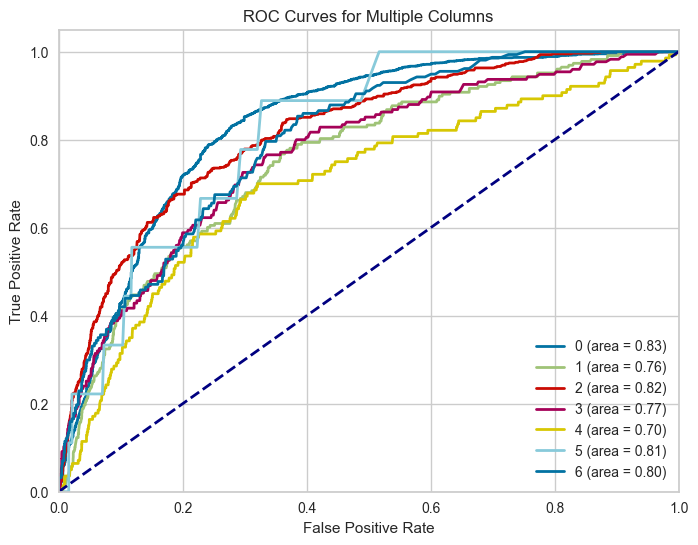

In [114]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
roc_auc_values = []
columns = ['prediction_score_0', 'prediction_score_1', 'prediction_score_2', 
'prediction_score_3', 'prediction_score_4',	'prediction_score_5','prediction_score_6']
for i in range(0, 7):
    preds = predictions[columns[i]]
    tmp = test_data.copy()
    if i == 0:
        tmp[tmp['target'] != i] = -1
        tmp[tmp['target'] == i] = 1
        tmp[tmp['target'] == -1] = 0
    else:
        tmp[tmp['target'] != i] = 0
        tmp[tmp['target'] == i] = 1
    fpr, tpr, _ = roc_curve(tmp['target'], preds)
    
    # Calculate ROC AUC
    roc_auc = auc(fpr, tpr)
    roc_auc_values.append(roc_auc)
    
    # Plot the ROC curve for the current column
    plt.plot(fpr, tpr, lw=2, label=f'{i} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiple Columns')
plt.legend(loc='lower right')

In [29]:
scoring_data = pd.read_csv("data scoring.csv")
scoring_data.sample(5)

,report_dt,horizon_dt,Базовый тип для прогноза,Район_new
814004,2022-10-08,2022-10-09,0,Чернушинский ГО
248932,2019-06-08,2019-06-10,Прочие опасности,Краснокамский ГО
404840,2020-04-14,2020-04-19,Опасные природные явления,Ильинский ГО
238537,2019-05-19,2019-05-27,Взрывы/пожары/разрушения,Оханский ГО
44007,2018-03-20,2018-03-28,Взрывы/пожары/разрушения,Губахинский МО


In [30]:
scoring_data.rename(columns={"report_dt":"Time"}, inplace=True)
scoring_data['Time'] = pd.to_datetime(scoring_data['Time'], format='%Y.%m.%d')

scoring_data = pd.merge(scoring_data, df_weather_morning_cherd, on='Time', how='inner', suffixes=('', '_mr_cherd'))
scoring_data = pd.merge(scoring_data, df_weather_morning_cher, on='Time', how='inner', suffixes=('', '_mr_cher'))
scoring_data = pd.merge(scoring_data, df_weather_morning_perm, on='Time', how='inner', suffixes=('', '_mr_perm'))

scoring_data = pd.merge(scoring_data, df_weather_aftrenoon_cher, on='Time', how='inner', suffixes=('', '_af_cher'))
scoring_data = pd.merge(scoring_data, df_weather_aftrenoon_cherd, on='Time', how='inner', suffixes=('', '_af_cherd'))
scoring_data = pd.merge(scoring_data, df_weather_aftrenoon_perm, on='Time', how='inner', suffixes=('', '_af_perm'))

scoring_data = pd.merge(scoring_data, df_disaster, on='Time', how='inner')
scoring_data = scoring_data.rename(columns={"Базовый тип для прогноза": "target"})

In [31]:
predictions_vl = predict_model(best, data=scoring_data.drop(columns=['Time','horizon_dt', 'target']), raw_score=True)

In [33]:
small = predictions_vl[['Район_new', 'prediction_label', 
'prediction_score_0', 
'prediction_score_1', 
'prediction_score_2', 
'prediction_score_3', 
'prediction_score_4', 
'prediction_score_5',
'prediction_score_6'
]]

In [36]:
scoring_data[['prediction_label', 
'prediction_score_0', 
'prediction_score_1', 
'prediction_score_2', 
'prediction_score_3', 
'prediction_score_4', 
'prediction_score_5',
'prediction_score_6']] = small[['prediction_label', 
'prediction_score_0', 
'prediction_score_1', 
'prediction_score_2', 
'prediction_score_3', 
'prediction_score_4', 
'prediction_score_5',
'prediction_score_6']]

In [38]:
scoring_data[['Time', 'horizon_dt','target', 'Район_new', 'prediction_label', 
'prediction_score_0', 
'prediction_score_1', 
'prediction_score_2', 
'prediction_score_3', 
'prediction_score_4', 
'prediction_score_5',
'prediction_score_6']].to_csv("preds_all.csv")

In [39]:
scoring_data[['Time', 'horizon_dt','target', 'Район_new', 'prediction_label', 
'prediction_score_0', 
'prediction_score_1', 
'prediction_score_2', 
'prediction_score_3', 
'prediction_score_4', 
'prediction_score_5',
'prediction_score_6']]

,Time,horizon_dt,target,Район_new,prediction_label,prediction_score_0,prediction_score_1,prediction_score_2,prediction_score_3,prediction_score_4,prediction_score_5,prediction_score_6
0,2018-01-01,2018-01-02,0,Пермский ГО,1,0.0916,0.6269,0.0745,0.0234,0.1745,0.0070,0.0020
1,2018-01-01,2018-01-02,0,Пермский МО,1,0.3131,0.4232,0.0776,0.0377,0.1383,0.0074,0.0027
2,2018-01-01,2018-01-02,0,Кунгурский МО,0,0.4146,0.3584,0.0377,0.0316,0.1479,0.0081,0.0017
3,2018-01-01,2018-01-02,0,Соликамский ГО,0,0.5232,0.2590,0.0278,0.0270,0.1593,0.0033,0.0004
4,2018-01-01,2018-01-02,0,Верещагинский ГО,0,0.4097,0.2613,0.0444,0.0276,0.2518,0.0025,0.0026
...,...,...,...,...,...,...,...,...,...,...,...,...
840602,2022-12-27,2022-12-28,Взрывы/пожары/разрушения,Ильинский ГО,0,0.8801,0.0253,0.0319,0.0019,0.0587,0.0008,0.0012
840603,2022-12-27,2022-12-28,Взрывы/пожары/разрушения,Большесосновский МО,0,0.8082,0.0313,0.0418,0.0042,0.1122,0.0010,0.0014
840604,2022-12-27,2022-12-28,Взрывы/пожары/разрушения,Косинский МО,0,0.8685,0.0197,0.0224,0.0148,0.0707,0.0010,0.0029
840605,2022-12-27,2022-12-28,Взрывы/пожары/разрушения,Ординский МО,0,0.9555,0.0066,0.0187,0.0014,0.0163,0.0006,0.0008


In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(scoring_data['target'].replace(name_to_int), scoring_data['prediction_label'])

0.5864976142240071

In [34]:
small

,Район_new,prediction_label,prediction_score_0,prediction_score_1,prediction_score_2,prediction_score_3,prediction_score_4,prediction_score_5,prediction_score_6
0,Пермский ГО,1,0.0916,0.6269,0.0745,0.0234,0.1745,0.0070,0.0020
1,Пермский МО,1,0.3131,0.4232,0.0776,0.0377,0.1383,0.0074,0.0027
2,Кунгурский МО,0,0.4146,0.3584,0.0377,0.0316,0.1479,0.0081,0.0017
3,Соликамский ГО,0,0.5232,0.2590,0.0278,0.0270,0.1593,0.0033,0.0004
4,Верещагинский ГО,0,0.4097,0.2613,0.0444,0.0276,0.2518,0.0025,0.0026
...,...,...,...,...,...,...,...,...,...
840602,Ильинский ГО,0,0.8801,0.0253,0.0319,0.0019,0.0587,0.0008,0.0012
840603,Большесосновский МО,0,0.8082,0.0313,0.0418,0.0042,0.1122,0.0010,0.0014
840604,Косинский МО,0,0.8685,0.0197,0.0224,0.0148,0.0707,0.0010,0.0029
840605,Ординский МО,0,0.9555,0.0066,0.0187,0.0014,0.0163,0.0006,0.0008


In [ ]:
predictions_vl.to_csv("preds.csv")